# Проект по SQL  Данные по венчурным фондам

    Описание проекта: Проанализировать данные о фондах и инвестициях и сформировать запросы к базе.  Данные состоят из 7 таблиц, каждая из которых имеет внешний ключ.


acquisition - Содержит информацию о покупках одних компаний другими

Таблица включает такие поля:

     - уникальный номер покупки;
     - идентификатор компании-покупателя;
     - идентификатор компании, которую покупают;
     - способ оплаты сделки:
        cash — наличными;
        stock — акциями компании;
        cash_and_stock — смешанный тип оплаты: наличные и акции.
     - сумма покупки в долларах;
     - дата совершения сделки;
     - дата и время создания записи в таблице;
     - дата и время обновления записи в таблице.

company

Содержит информацию о компаниях-стартапах.

     -уникальный номер компании;
     -название компании;
    - категория деятельности компании
    - статус компании:
    - риобретена;
     - действует;
        ipo — вышла на IPO;
        closed — перестала существовать.
    - дата основания компании;
    - дата закрытия компании;
    - домен сайта компании;
    - название профиля компании в твиттере;
    - код страны, например, USA для США, GBR для Великобритании;
    - число раундов, в которых компания участвовала как инвестор;
    - число раундов, в которых компания привлекала инвестиции;
    - сумма привлечённых инвестиций в долларах;
    - количество важных этапов в истории компании;
    - дата и время создания записи в таблице;
    - дата и время обновления записи в таблице.

education

Хранит информацию об уровне образования сотрудников компаний.

     -уникальный номер записи с информацией об образовании;
     -идентификатор человека, информация о котором представлена в записи;
     -учебная степень,например:
        BA — Bachelor of Arts — бакалавр гуманитарных наук;
        MS — Master of Science — магистр естественных наук.
     - учебное заведение, название университета;
     - дата завершения обучения, выпуска;
     - дата и время создания записи в таблице;
     - дата и время обновления записи в таблице.

fund

Хранит информацию о венчурных фондах.

    -  уникальный номер венчурного фонда;
    -  название венчурного фонда;
    -  дата основания фонда;
    - домен сайта фонда;
    - профиль фонда в твиттере;
    - код страны фонда;
    - число инвестиционных раундов, в которых фонд принимал участие;
    - число компаний, в которые инвестировал фонд;
    - количество важных этапов в истории фонда;
    - дата и время создания записи в таблице;
    - дата и время обновления записи в таблице.

funding_round

Содержит информацию о раундах инвестиций.

    - уникальный номер инвестиционного раунда;
    - уникальный номер компании, участвовавшей в инвестиционном раунде;
    - дата проведения раунда;
    - тип инвестиционного раунда, например:
        venture — венчурный раунд;
        angel — ангельский раунд;
        series_a — раунд А.
    - сумма инвестиций, которую привлекла компания в этом раунде в долларах;
    - предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
    - количество участников инвестиционного раунда;
    - является ли этот раунд первым для компании;
    - является ли этот раунд последним для компании;
    - дата и время создания записи в таблице;
    - дата и время обновления записи в таблице.

investment
Содержит информацию об инвестициях венчурных фондов в компании-стартапы.

    - уникальный номер инвестиции;
    - уникальный номер раунда инвестиции;
    - уникальный номер компании-стартапа, в которую инвестируют;
    - уникальный номер фонда, инвестирующего в компанию-стартап;
    - дата и время создания записи в таблице;
     -дата и время обновления записи в таблице.

people

Содержит информацию о сотрудниках компаний-стартапов.

    -уникальный номер сотрудника;
    -имя сотрудника;
    -фамилия сотрудника;
    -уникальный номер компании-стартапа;
    -профиль сотрудника в твиттере;
    -дата и время создания записи в таблице;
    -дата и время обновления записи в таблице

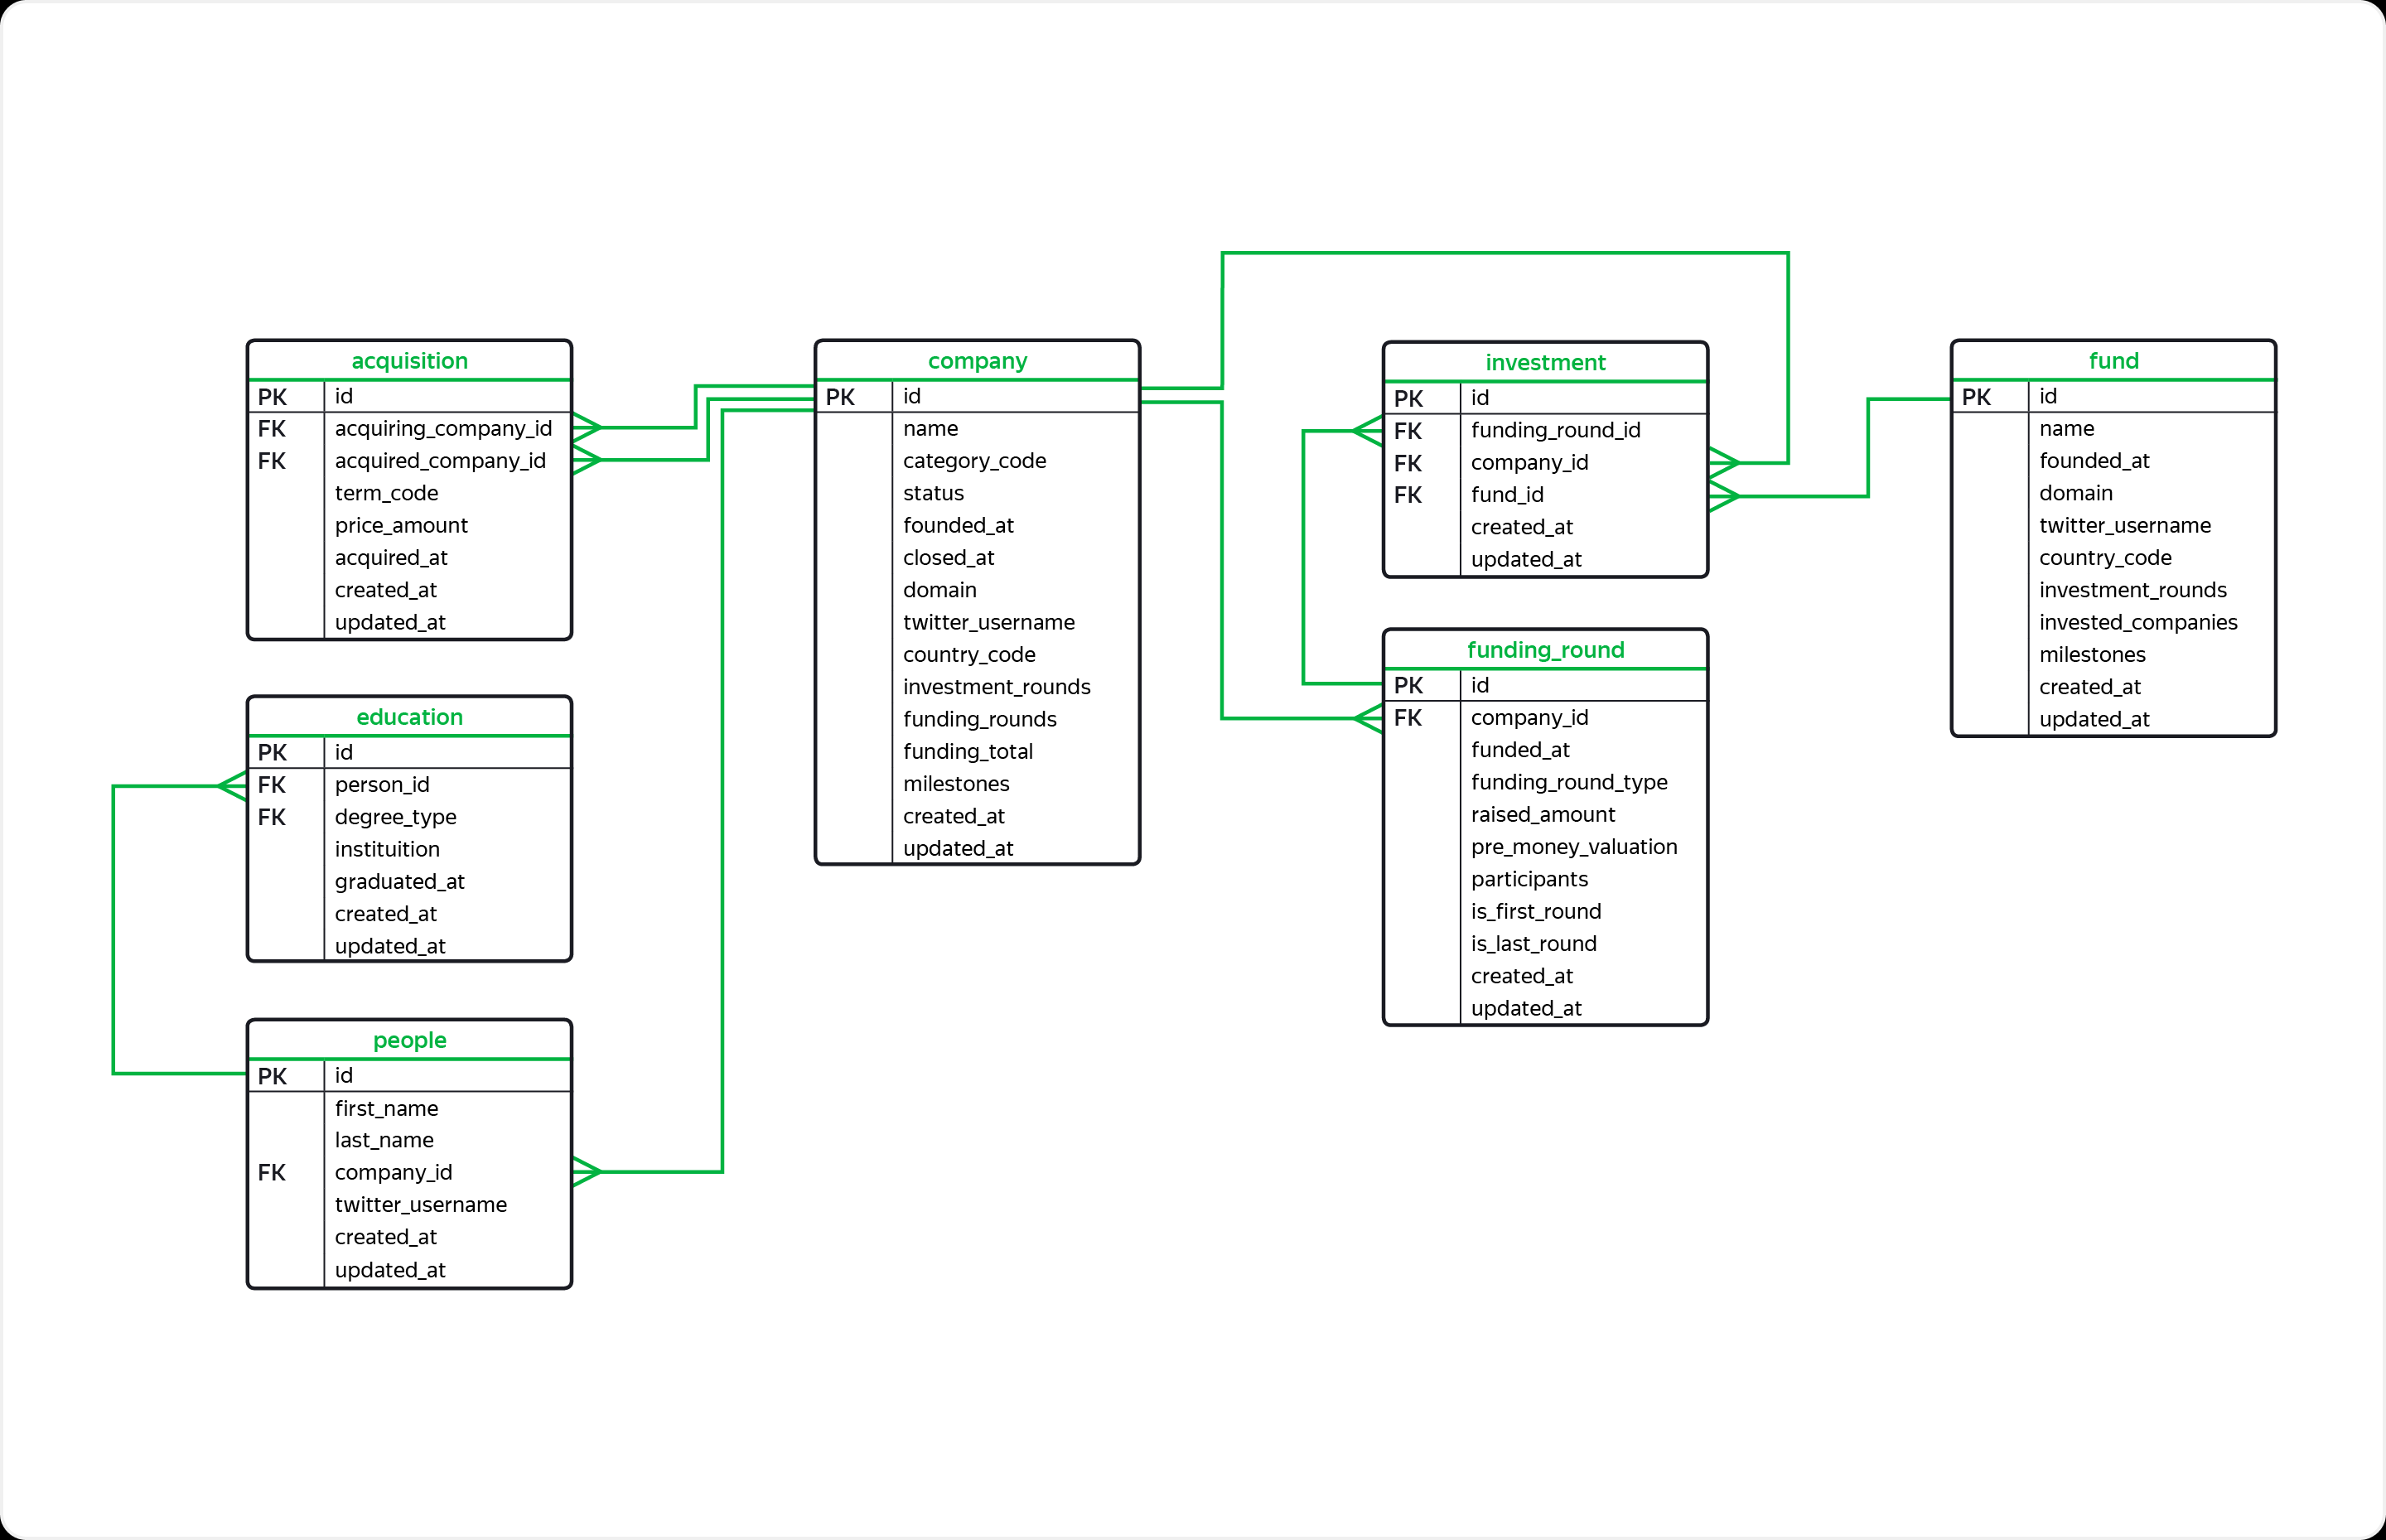

Задание 1: Посчитайте, сколько компаний закрылось.

In [5]:
query='''SELECT COUNT(status)
         FROM company
         WHERE status ='closed;
      '''  

Результат
count
2584

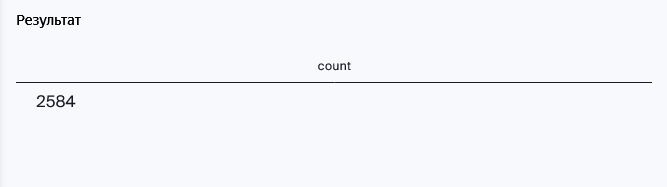

2.
Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total .

In [9]:
query = '''SELECT funding_total
           FROM company 
           WHERE country_code ='USA'
           AND category_code ='news'
           ORDER BY funding_total DESC;'''


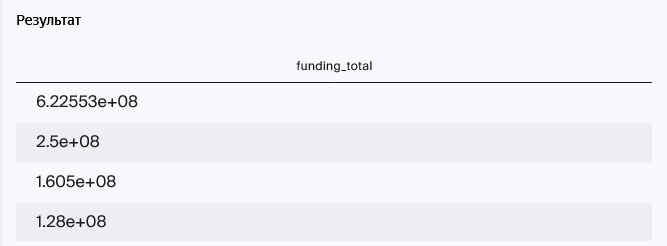

3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [10]:
 query = '''SELECT SUM(price_amount)
            FROM acquisition
            WHERE term_code = 'cash'
            AND EXTRACT(YEAR FROM CAST(acquired_at AS date)) BETWEEN '2011' AND '2013';'''


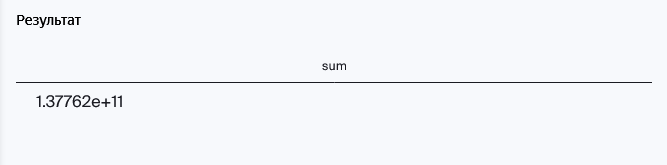

4.
Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [11]:
query ='''SELECT first_name,
                 last_name,
          twitter_username
               FROM people
          WHERE twitter_username LIKE'Silver%';'''  

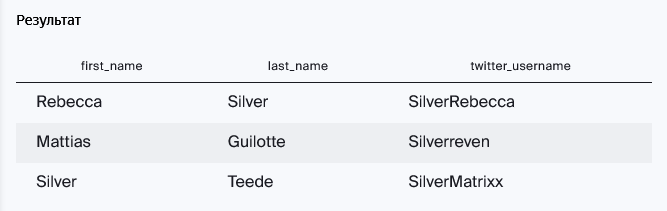

5.
Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'

In [13]:
query ='''SELECT *
       FROM people
       WHERE twitter_username LIKE '%money%' AND last_name LIKE'K%';'''

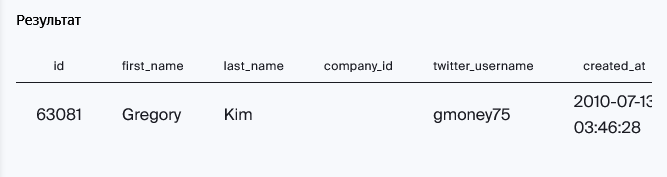

6.
Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [14]:
query ='''SELECT  country_code,
            SUM(funding_total) 
            FROM company
         GROUP BY country_code
         ORDER BY (SUM(funding_total))DESC;'''

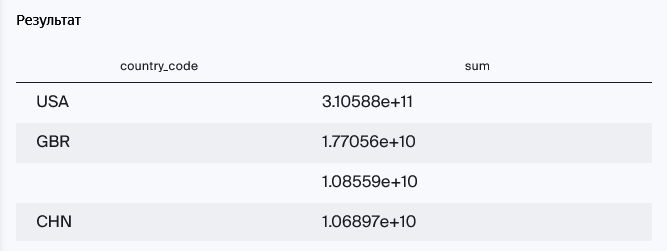

7.
Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [15]:
query ='''SELECT funded_at,
       MIN(raised_amount),
       MAX(raised_amount )
       FROM funding_round
       GROUP BY funded_at
       HAVING MIN(raised_amount)!=0 AND MIN(raised_amount)!=MAX(raised_amount );'''

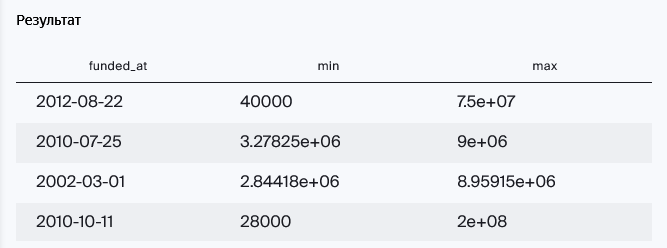

8.
Создайте поле с категориями:

    Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
    Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
    Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.

Отобразите все поля таблицы fund и новое поле с категориями.

In [16]:
query ='''SELECT *,
          CASE
           WHEN invested_companies >=100 THEN 'high_activity'
           WHEN invested_companies>=20 AND invested_companies <100 THEN 'middle_activity'
           WHEN invested_companies<20 THEN 'low_activity'
         END
         FROM fund;'''

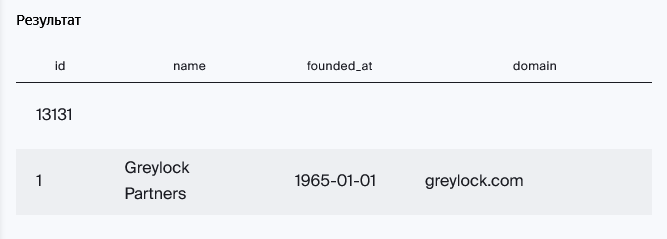

9.
Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [17]:
query ='''SELECT 
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20  AND invested_companies<100 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity, 
       ROUND(AVG(investment_rounds)) AS average_rounds
       FROM fund     
GROUP BY activity
ORDER BY average_rounds;'''

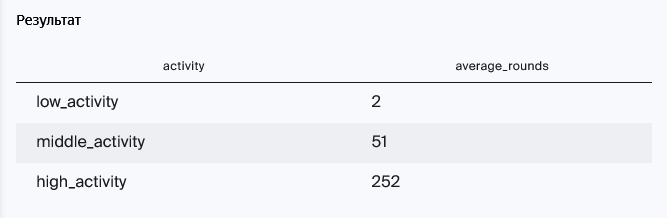

10.
Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Выгрузите десять самых активных стран-инвесторов.
Отсортируйте таблицу по среднему количеству компаний от большего к меньшему, а затем по коду страны в лексикографическом порядке.

In [18]:
query ='''SELECT country_code,
       MIN(invested_companies) AS min_invested_companies,
       MAX(invested_companies) AS max_invested_companies ,
       AVG(invested_companies) AS avg_invested_companies
FROM fund
WHERE EXTRACT(YEAR FROM CAST(founded_at AS timestamp))BETWEEN '2010' AND '2012'
GROUP BY   country_code  
HAVING MIN(invested_companies)!=0
ORDER BY avg_invested_companies DESC
LIMIT 10;'''
       

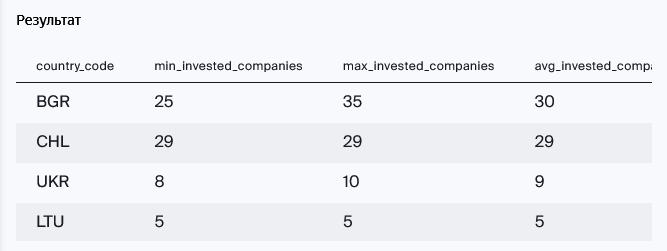

11.
Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [19]:
query ='''SELECT first_name,
       last_name,
       instituition
FROM people AS p
LEFT JOIN education as ed ON ed.person_id= p.id;'''

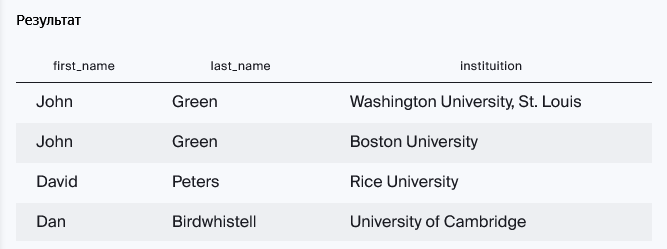

12.
Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [20]:
query ='''SELECT c.name as name_company,
       COUNT(DISTINCT instituition) AS count_instituition
FROM people AS p
JOIN education as ed ON ed.person_id = p.id
JOIN company as c ON p.company_id= c.id
GROUP BY name_company
ORDER BY count_instituition DESC
LIMIT 5;'''

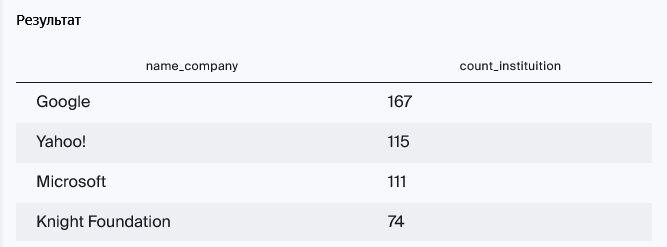

13.
Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [21]:
query ='''SELECT DISTINCT c.name
FROM company as c
JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.status = 'closed' and fr.id IN (SELECT id
                             FROM funding_round
                             WHERE is_first_round ='1' and is_last_round='1');'''

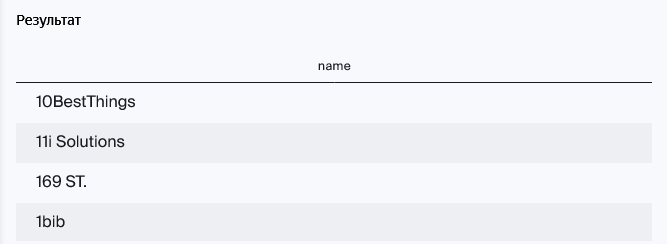

14.
Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [22]:
query ='''SELECT p.id
FROM people AS p 
WHERE company_id IN (SELECT id
                     FROM company 
                     WHERE id IN (SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1 AND is_last_round = 1)
                     AND status = 'closed');'''

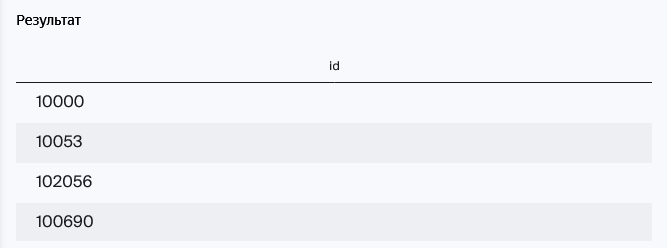

15.
Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [23]:
query ='''SELECT DISTINCT p.id,
       ed.instituition
FROM people AS p 
JOIN education AS ed ON ed.person_id = p.id
WHERE company_id IN (SELECT id
                     FROM company 
                     WHERE id IN (SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1 AND is_last_round = 1
                     AND status = 'closed'));'''

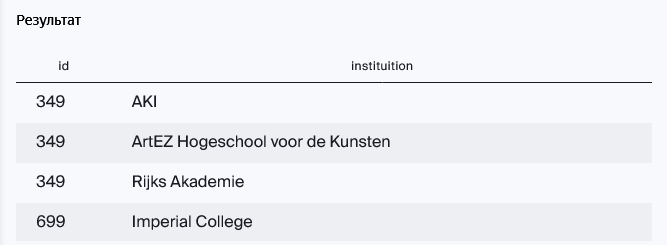

16.
Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [24]:
query ='''SELECT DISTINCT p.id,
       COUNT(ed.instituition)
FROM people AS p 
JOIN education AS ed ON ed.person_id = p.id
WHERE company_id IN (SELECT id
                     FROM company 
                     WHERE id IN (SELECT company_id
                                  FROM funding_round
                                  WHERE is_first_round = 1 AND is_last_round = 1
                     AND status = 'closed'))
                     GROUP BY  p.id;'''

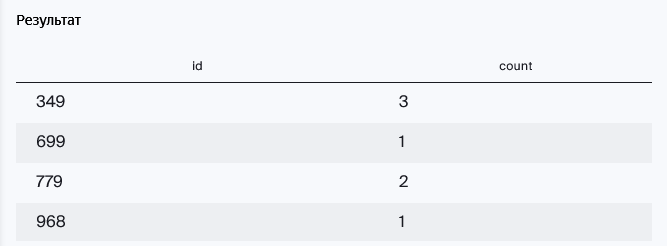

17.
Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [25]:
query ='''SELECT AVG(t.total_instituition)
FROM (SELECT p.id, 
      COUNT(e.instituition) AS total_instituition
      FROM people AS p JOIN education AS e ON p.id = e.person_id
      WHERE company_id IN (SELECT id
                           FROM company 
                           WHERE id IN (SELECT company_id
                                        FROM funding_round
                                        WHERE is_first_round = 1 AND is_last_round =1)
                                        AND status = 'closed')
      GROUP BY p.id) AS t;'''

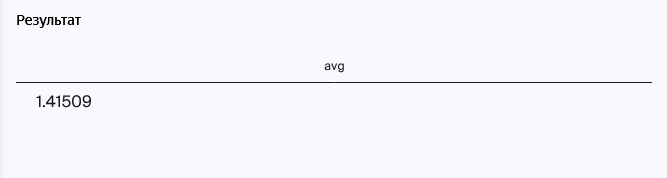


18.
Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

In [26]:
query ='''SELECT AVG(t.total_instituition)
FROM (SELECT p.id, 
      COUNT(e.instituition) AS total_instituition
      FROM people AS p JOIN education AS e ON p.id = e.person_id
      WHERE company_id IN (SELECT id
                           FROM company AS c
                           WHERE c.name = 'Facebook')
      GROUP BY p.id) AS t;'''

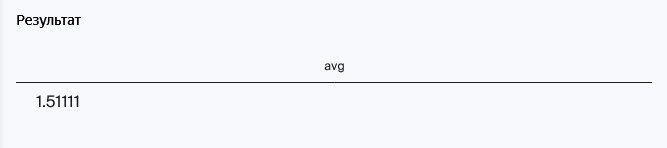

19.
Составьте таблицу из полей:

    name_of_fund — название фонда;
    name_of_company — название компании;
    amount — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [27]:
query ='''SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON i.company_id = c.id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN (SELECT * 
           FROM funding_round
           WHERE EXTRACT(YEAR FROM funded_at) BETWEEN 2012 AND 2013) AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6; '''      

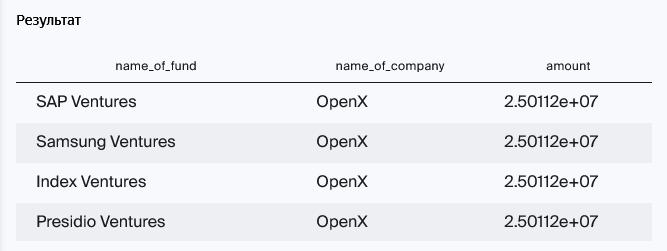

20.
Выгрузите таблицу, в которой будут такие поля:

    название компании-покупателя;
    сумма сделки;
    название компании, которую купили;
    сумма инвестиций, вложенных в купленную компанию;
    доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [29]:
query ='''SELECT c.name,
       price_amount,
       com.name ,
       com.funding_total,
       ROUND(price_amount/com.funding_total)
FROM acquisition AS a
JOIN company AS c ON c.id = a.acquiring_company_id 
JOIN company AS com ON com.id = a.acquired_company_id 
WHERE price_amount!=0 AND com.funding_total!=0
ORDER BY price_amount DESC, com.name
LIMIT 10;'''  

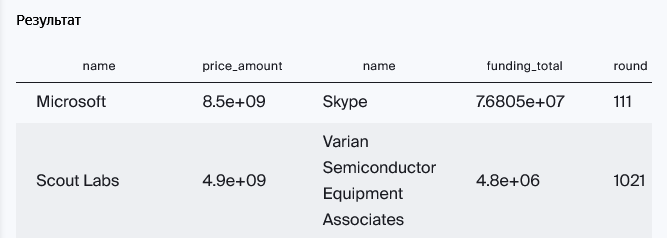

21.
Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [30]:
query ='''SELECT name AS name_company,
       EXTRACT(MONTH FROM fr.funded_at)
FROM company AS c
LEFT JOIN funding_round AS fr ON fr.company_id = c.id
WHERE category_code = 'social' AND EXTRACT(YEAR FROM fr.funded_at) BETWEEN 2010 AND 2013
 AND fr.raised_amount != 0;''' 


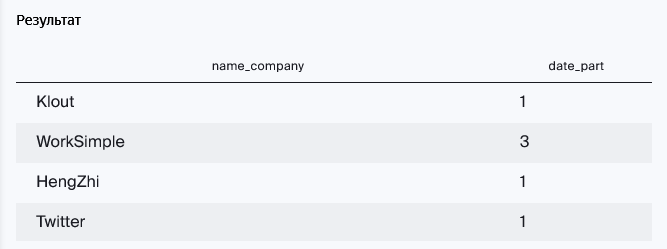

22.
Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:

    номер месяца, в котором проходили раунды;
    количество уникальных названий фондов из США, которые инвестировали в этом месяце;
    количество компаний, купленных за этот месяц;
    общая сумма сделок по покупкам в этом месяце.

In [31]:
query ='''WITH month_fund AS
  (SELECT EXTRACT(MONTH
                  FROM fr.funded_at) AS MONTH,
          COUNT(DISTINCT f.name) AS count_of_fund
   FROM funding_round AS fr
   LEFT JOIN investment AS i ON i.funding_round_id = fr.id
   LEFT JOIN fund AS f ON i.fund_id = f.id
   WHERE EXTRACT(YEAR
                 FROM fr.funded_at) BETWEEN 2010 AND 2013
     AND f.country_code = 'USA'
   GROUP BY MONTH),
     month_acquired AS
  (SELECT EXTRACT(MONTH
                  FROM acquired_at) AS MONTH,
          COUNT(acquired_company_id) AS count_of_acquired,
          SUM(price_amount) AS sum_of_acquired
   FROM acquisition
   WHERE EXTRACT(YEAR
                 FROM acquired_at) BETWEEN 2010 AND 2013
   GROUP BY MONTH)

SELECT month_fund.month,
       month_fund.count_of_fund,
       month_acquired.count_of_acquired,
       month_acquired.sum_of_acquired
FROM month_fund
JOIN month_acquired ON month_fund.month = month_acquired.month;''' 

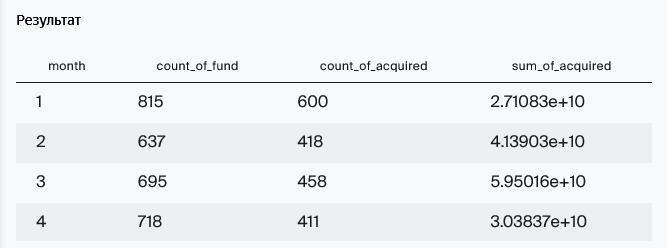

23.
Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [32]:
query ='''WITH 
int_2011 AS (SELECT country_code,
             AVG(funding_total ) AS year_2011
             FROM company
             WHERE EXTRACT(YEAR FROM founded_at) = 2011
             GROUP BY country_code),
 int_2012 AS (SELECT country_code,
             AVG(funding_total ) AS year_2012
             FROM company
             WHERE EXTRACT(YEAR FROM founded_at) = 2012
           GROUP BY country_code),  
 int_2013 AS (SELECT country_code,
             AVG(funding_total ) AS year_2013
             FROM company
             WHERE EXTRACT(YEAR FROM founded_at) = 2013
                GROUP BY country_code)  
   SELECT int_2011.country_code,
      int_2011.year_2011,
      int_2012.year_2012,
      int_2013.year_2013
FROM int_2011 
INNER JOIN int_2012 ON int_2011.country_code =int_2012.country_code
INNER JOIN int_2013 ON int_2012.country_code =int_2013.country_code
ORDER BY int_2011.year_2011 DESC; '''               


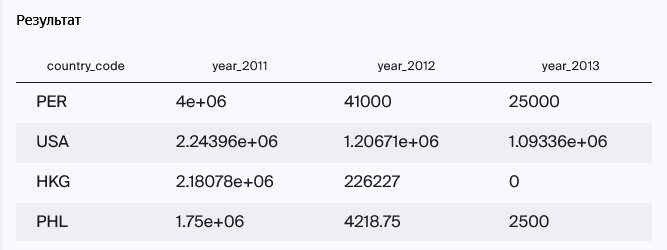

Вывод: Данные проанализированы и сформированы 23 SQL-запроса.